# Crash Carts Lab
## PH 211 COCC
### Bruce Emerson 24/1/2021

This notebook is meant to provide tools and discussion to support data analysis and presentation as you generate your lab reports. This year due to COVID simulated data for this lab will be provided. I wish there were a way to actually generate something approximating real data but I haven't found it yet.

[Crash Carts Lab](http://coccweb.cocc.edu/bemerson/PhysicsGlobal/Courses/PH211/PH211Materials/PH211Labs/PH211LabCrashCarts.html) 

In this lab we are gathering (using) some data to describe the movement of a cart down the hallway. Along the way we are experiencing some features of Newton's 1st and 2nd Laws. Ultimately you will be asked to apply your understanding of the plots and the measured uncertainties to a challenge problem.

**COVID**

### Data:

Since we are working with the data as if we had done the experimental part of the lab, but in fact you haven't, it seems polite to describe a little more what the f2f lab expectations were/are. In the lab I have set of 4 wheeled 'skateboards' large enough for a student to sit down on them. Each group of 4 or 5 students is issued a 'skateboard' and asked to figure out how to push it down the hallway at a constant velocity. One student must ride on the cart and the student pushing is **BLINDFOLDED**!. The 'skateboards' are sometimes a little aggravating and don't want to go straight but mostly the groups have to discover who is the most reliable pusher (steady velocity) and what that velocity is. Multiple measurements lead so some level of inconsistency in the speed but usually in 30 min or so the groups have sorted out who to use as a pusher, who rides the cart, and who is good at gathering data. No coaching of the pusher is allowed during each experiment. Each group has to determine a 'slow' and 'fast' velocity that they can maintain with some confidence.

### Application:

Groups are then randomly paired up with other groups using some process. One group is assigned to be the 'fast speed' group and the other is the 'slow speed' group. Similarly one group is assigned to pass in front of the other. Each group is assigned one hallway of two intersecting hallways. Collectively they have to decide when to start pushing, while blindfolded, so that they pass within 1 m of each other at the intersection and the appropriate group passes in front. Given that the carts are 1 m x 1 m you need to account for the size of the cart in this determination. 

The tools in this notebook are used to determine the solution criteria. After and hour or so of entering data and calculating we gather in the hallways and see if it works. So far we have not injured any students although the excitement of the event sometimes leads to people pushing faster than they did is the data/calibration phase and then things get exciting. We do allow the teams to call 'ABORT' if needed for safety but this is rare.

### Lab Report:

See the Lab Delivarables embedded in this notebook.

### Dependencies

This is where we load in the various libraries of python tools that are needed for the particular work we are undertaking.  
  
```numpy``` is a numerical tools library - often imported as np. ```numpy``` also contains the statistical tools that we will use in this lab. There are other libraries dedicated to statistical tools but 'numpy' has everything we need.  
```matplotlib```is a 'MATLAB like' library. 
```matplotlib.pyplot``` is often imported as ```plt``` to make it easier to use. ```matplotlib``` has the plotting tools that we need for this lab. ```matplotlib.patches``` allows me to place shapes on the plot which will be useful in this lab. 

The following code cell will need to be run first before any other code cells.

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.patches as patch


## Simulated Data:

What is presented below is simulated data ('fake' data) that is a reasonable representation of actual data in past years. There are two sets of data - a slow set and a fast set. Grab a die (1 - 6 sided dice) and roll it twice. Once for the slow data and once for the fast data. All the data is in m/s


**Slow Data:**      
Group 1: [ 0.94  1.02  0.92  0.41  1.23  0.29]  
Group 2: [ 1.09  1.37  1.32  1.07  0.98  0.81]  
Group 3: [ 0.75  0.55  0.93  1.03  0.69  0.8 ]  
Group 4: [ 1.15  1.19  1.2   1.09  1.24  1.16]  
Group 5: [ 0.61  0.38  0.08  0.79 -0.06  0.48]  
Group 6: [ 0.    0.63  0.23  0.58  0.05  0.15] 
 
**Fast Data:**    
Group 1: [2.49 2.73 1.96 2.37 1.52 1.85]  
Group 2: [1.7  1.67 1.76 1.65 1.68 1.62]   
Group 3: [1.76 2.05 1.34 1.79 1.81 1.36]  
Group 4: [2.47 1.8  1.58 2.13 2.27 1.56]  
Group 5: [1.62 1.74 1.34 1.56 1.78 1.21]  
Group 6: [1.45 1.68 1.81 2.06 1.66 1.75]  
 
### Hallway Starting Points:

For reference later the starting point for one hallway is 6 m from the intersection of the hallways and the starting point in the other hallway is 9 m from the intersection. File that away under useful info.

***
## Lab Deliverable:

After the usual header information on your lab articulate in a markdown well which data sets you are using. Enter the data you are using into the code cell below this as indicated by the comment in the code.

***

## Data and Models

As we have talked about in previous labs data that we gather for physics labs will usually be entered manually into a 'list'. In this lab we will be using tools from the Data/Meaning Lab to assess our data and it's variability and then using the ideas of modeling from the Bungee Characterization Lab to create a physics model of  your group's cart and it's behavior.

The variability is defined (for this class) to be the ratio of the standard deviation (sigma) to the mean expressed as a percent. The statistical commands from numpy should seem familiar from the Data and Meaning Lab where we previously used them.

The request in the lab is that you 'train' to be able to push a kinematics cart down the hallway at a constant speed. Remember that the pusher will be blindfolded for the actuall challenge so it would be good to practice that same way. Before being allowed to proceed to the modeling part of the lab you must show that you have a reasonable grasp of the variability of the speed of your cart. 

**Notebook Notes**
Notice in the second print statement I have to use %% to get the % sign to print. % is a control character so it needs special handling. The %.3f tells the print statement to report the variable with 3 decimal points. Helps keep calculation trash to a minimum.

```print("Our average slow speed is %.3f m/s with a standard deviation of %.3f." % (slowMean,slowSigma))```  

This is an example of a print statement where we want to embed multiple variables. The ```%.3f``` tells python to look for a variable after the '%' sign and insert the value of that variable in this location in the print statement. The '.3f' tells it to report 3 decimal places  of the floating point variable. There are other options but try changing the '.3f' to '.5f' to see what happens. 

In [2]:
# Enter Slow Speed data here and determine data characteristics
slowData = [1.24,1.27,1.30,1.15]
slowMean = np.mean(slowData)
slowSigma = np.std(slowData)
slowVar = 100.*slowSigma/slowMean

fastdData = [2.3,2.15,2.43,1.97]
fastMean = np.mean(fastdData)
fastSigma = np.std(fastdData)
fastVar = 100.*fastSigma/fastMean


# 2 ways to print out and check your data
print("Our average slow speed is %.3f m/s with a standard deviation of %.3f." % (slowMean,slowSigma))
print("The variability is %.2f%%" % slowVar)
print("Our average fast speed is %.3f m/s with a standard deviation of %.3f." % (fastMean,fastSigma))
print("The variability is %.2f%%" % fastVar)

Our average slow speed is 1.240 m/s with a standard deviation of 0.056.
The variability is 4.53%
Our average fast speed is 2.212 m/s with a standard deviation of 0.172.
The variability is 7.75%


### Model your cart

A physics model is a mathematical description of how a particular process seems to evolve. In this case we are modeling the behavior of the 'skateboard' as an object that moves at constant velocity. That would be a straight line on an x,t plot. Let's start with plotting the basic models for the fast and slow cart. 

A model is different than experimental data. To plot the model we need to establish a set of x and t values for our fast and slow 'skateboards. One easy way to to this is to choose a set of value for t and then calculate the expected x value. Each model starts at \[0,0\] and proceeds through time for at least 9 m. 

In this case our model is an object moving at constant velocity whose position is described by the expression...  

$$ x_{skateboard} = x_0 + v_{skateboard}\:  t$$

### Generating values for t:

To generate a set of times for our model we use the ```numpy.linspace()``` command.

[numpy.linspace docs](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html?highlight=linspace#numpy.linspace)

In the code below it looks like this...  

```modelTime = np.linspace(0.,10.,20)``` 

In this command the first argument is the minimum value for the range of times (0.), the second argument is the maximum value (10.), and the third argument is the number of equally spaced values you want (20). This example asks numpy to generate 20 equally spaced values from 0 to 10.

### Model Parameters:

Looking above at our model I need to know certain parameters of the model once I am given a t. I need $v_{skateboard}$ which is the slope of my model and I need $x_0$ which is the initial position of the skateboard.

In [3]:
# range of t values -- choose lower and upper limits of range
modelTime = np.linspace(0.,10.,20)

# actual model parameters - slope and intercept
modelSlow = slowMean
modelSlowInt = 0.

# generate x values from model -- exactly the equation in the cell above.
modelSlowX = modelSlowInt + modelSlow*modelTime

#print(modelTime)
#print(modelSlowX)

### Plot the Model:

Using tools from previous labs plot it. This should feel relatively familiar. Breath deep because we're going deeper this time.

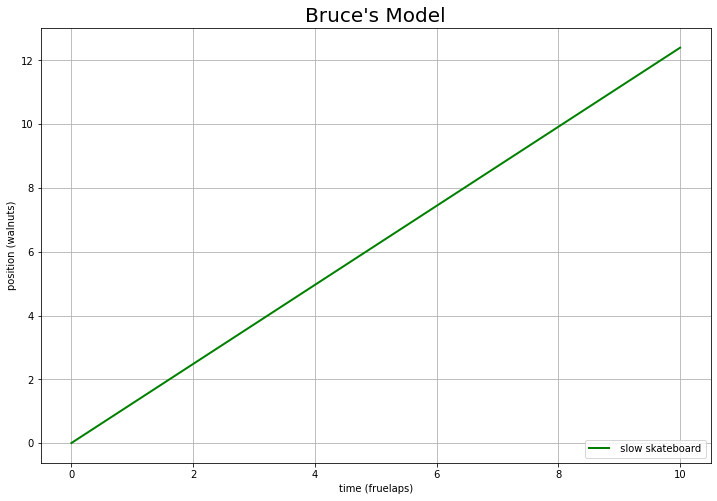

In [4]:
fig1, ax1 = plt.subplots()

ax1.plot(modelTime, modelSlowX, color = 'green', linestyle = '-', linewidth = 2., label = " slow skateboard")

# a more explicit way to set labels
plt.xlabel('time (fruelaps)', fontsize = 10)
plt.ylabel('position (walnuts)', fontsize = 10)
plt.title('Bruce\'s Model', fontsize = 20)

ax1.grid()
fig1.set_size_inches(12, 8)
plt.legend(loc= 4)
plt.show()

### Making Model Richer I:

In the case of our 'skateboard' we need to worry about where the front and back edge of the skateboard is. This is a point half the width of the skateboard in front of my model and half the width behind it. The first code cell sets up the equations for the front and back of the skateboard. Then I plot it again. Notice different line style for the plot of the front and back corner as well as linewidth.

**Question**

Are you clear about why all the plotted lines are parallel?

In [5]:
# width of the 'skateboard' front to back
cartLength = 0.6
frontOffset = cartLength/2.
backOffset = cartLength/2.

# generate location of front and back corners. Same slope different initial values
frontSlowX = (modelSlowInt + frontOffset) + modelSlow*modelTime
backSlowX = (modelSlowInt - backOffset) + modelSlow*modelTime

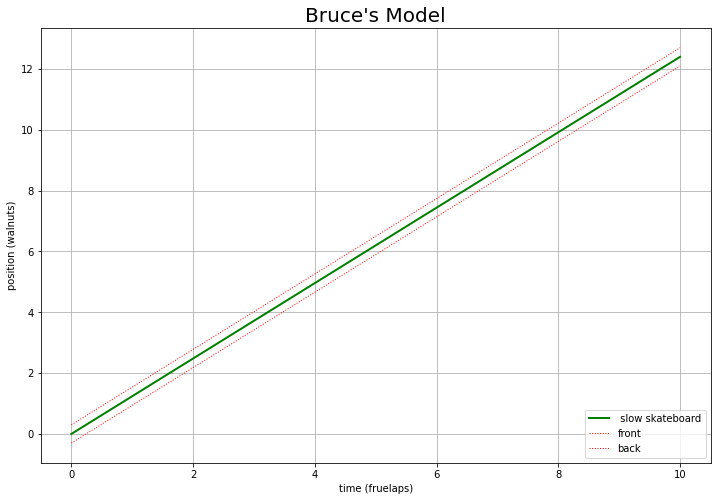

In [6]:
fig2, ax2 = plt.subplots()

ax2.plot(modelTime, modelSlowX, color = 'green', linestyle = '-', linewidth = 2., label = " slow skateboard")
ax2.plot(modelTime, frontSlowX, color = 'red', linestyle = ':', linewidth = 1., label = "front")
ax2.plot(modelTime, backSlowX, color = 'red', linestyle = ':', linewidth = 1., label = "back")

# a more explicit way to set labels
plt.xlabel('time (fruelaps)', fontsize = 10)
plt.ylabel('position (walnuts)', fontsize = 10)
plt.title('Bruce\'s Model', fontsize = 20)

ax2.grid()
fig2.set_size_inches(12, 8)
plt.legend(loc= 4)
plt.show()

### Making Model Richer II:

The previous plot asssumes a perfect skateboard that moves at exactly the average speed the data suggests. But there is always some variability. You have that variability from the analysis of your data way back. Here's where it gets more interesting. When the skateboard is going faster than we expect it's the front corner that's most worrisome. When the skateboard is going slower than we expect it's the back corner. This suggests that changing the slope (speed) of the front and back corners will give us a good sense of the range of possibilities for where the cart is. The front corner of the skateboard for a slightly faster case and the reverse for the back corner.

In [7]:
# faster front speed and slower back speed.
frontSlowFast = slowMean + slowSigma # front corner speed for faster board
backSlowSlow = slowMean - slowSigma # back corner speed for slower board

# generate location of front and back corners. different slopes per discussion
frontSFX = (modelSlowInt + frontOffset) + frontSlowFast*modelTime
backSSX = (modelSlowInt - backOffset) + backSlowSlow*modelTime


### Plot

Look to the Bungee lab for references about plotting if you need reminders (I do).


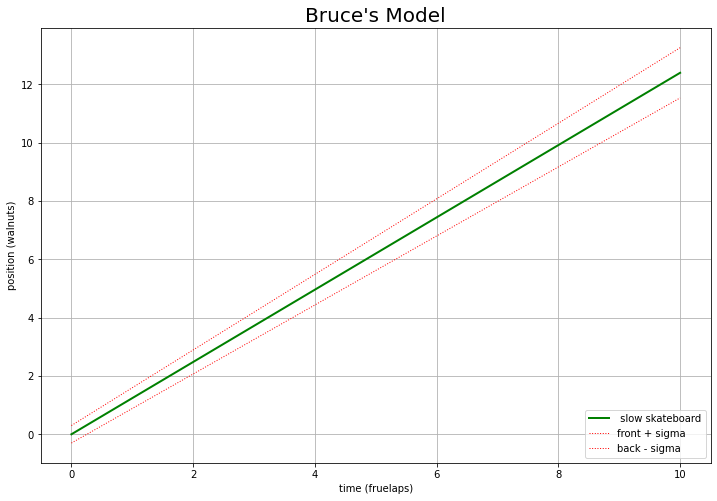

In [8]:
fig3, ax3 = plt.subplots()

ax3.plot(modelTime, modelSlowX, color = 'green', linestyle = '-', linewidth = 2., label = " slow skateboard")
ax3.plot(modelTime, frontSFX, color = 'red', linestyle = ':', linewidth = 1., label = "front + sigma")
ax3.plot(modelTime, backSSX, color = 'red', linestyle = ':', linewidth = 1., label = "back - sigma")

# a more explicit way to set labels
plt.xlabel('time (fruelaps)', fontsize = 10)
plt.ylabel('position (walnuts)', fontsize = 10)
plt.title('Bruce\'s Model', fontsize = 20)

ax3.grid()
fig3.set_size_inches(12, 8)
plt.legend(loc= 4)
plt.show()

***
## Lab Deliverable:

Present the plot of the model for your slow data with the front and back locations reflecting the variability in your data. Explain in your own words why the front and back corners spread apart as the plot progresses.

Then add your model for the skateboard described by your fast data to the plot above and present this new plot. Choose different colors for the fast skateboard so it is easily distinguished from the slow skateboard.

At this point make sure you have fixed the labels on the plot. It's a tiny pain to cut and paste but once you've fixed it that's not so bad.

***

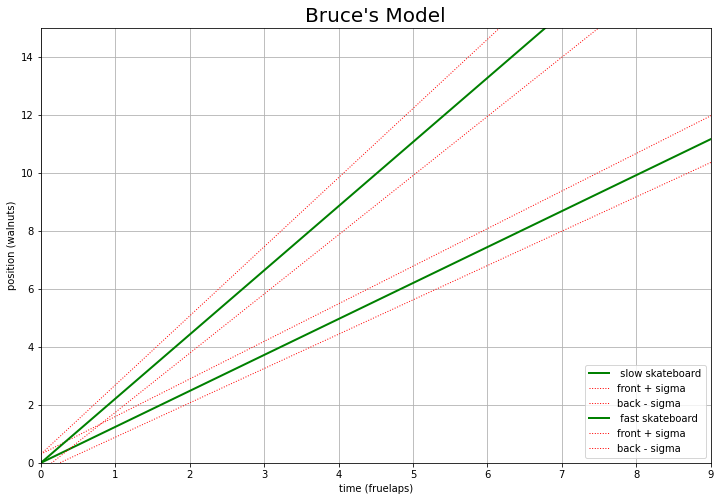

In [9]:
# actual model parameters - slope and intercept fast cart
modelFast = fastMean
modelFastInt = 0.

# generate x values from model -- exactly the equation in the cell above.
modelFastX = modelFastInt + modelFast*modelTime

# faster front speed and slower back speed.
frontFastFast = fastMean + fastSigma # front corner speed for faster board
backFastSlow = fastMean - fastSigma # back corner speed for slower board

# generate location of front and back corners. different slopes per discussion
frontFFX = (modelFastInt + frontOffset) + frontFastFast*modelTime
backFSX = (modelFastInt - backOffset) + backFastSlow*modelTime

# plot it
fig4, ax4 = plt.subplots()

# slow skateboard
ax4.plot(modelTime, modelSlowX, color = 'green', linestyle = '-', linewidth = 2., label = " slow skateboard")
ax4.plot(modelTime, frontSFX, color = 'red', linestyle = ':', linewidth = 1., label = "front + sigma")
ax4.plot(modelTime, backSSX, color = 'red', linestyle = ':', linewidth = 1., label = "back - sigma")

# fast skateboard
ax4.plot(modelTime, modelFastX, color = 'green', linestyle = '-', linewidth = 2., label = " fast skateboard")
ax4.plot(modelTime, frontFFX, color = 'red', linestyle = ':', linewidth = 1., label = "front + sigma")
ax4.plot(modelTime, backFSX, color = 'red', linestyle = ':', linewidth = 1., label = "back - sigma")

# a more explicit way to set labels
plt.xlabel('time (fruelaps)', fontsize = 10)
plt.ylabel('position (walnuts)', fontsize = 10)
plt.title('Bruce\'s Model', fontsize = 20)

# controlling x and y limits on plot to keep things where I want them
plt.xlim([0, 9])
plt.ylim([0, 15])

ax4.grid()
fig4.set_size_inches(12, 8)
plt.legend(loc= 4)
plt.show()


## Challenge:

The challenge is how to get both skateboards to the intersection point of the hallways and be within 1 m of each other and not hit corners.

Let's assume for starters that the fast skateboard is in the hallway with the shorter distance to the intersection point. Under the circumstances the fast skateboard will need to wait some amount of time before starting or things will go badly. To make the fast skateboard 'wait' on the plot I just add a time offset to the t values that I am plotting. In this example I have told my model to wait 1.5 s. You will see that this slides the starting point for the fast cart to 1.5 s on the horizontal axis.

### 9 m From Start of Slow Skateboard

I have also added a horizontal reference line that represents the point 9 m from the starting point of the slow skateboard. 

### Interpretation:

Take a moment to look at the plot and interpret what it says. Did the fast skateboard get to 9 m before or after the slow skateboard? How far apart were they when one passed in front of the other? If the fast skateboard only has 6 m to get to the intersection how do I plot that?



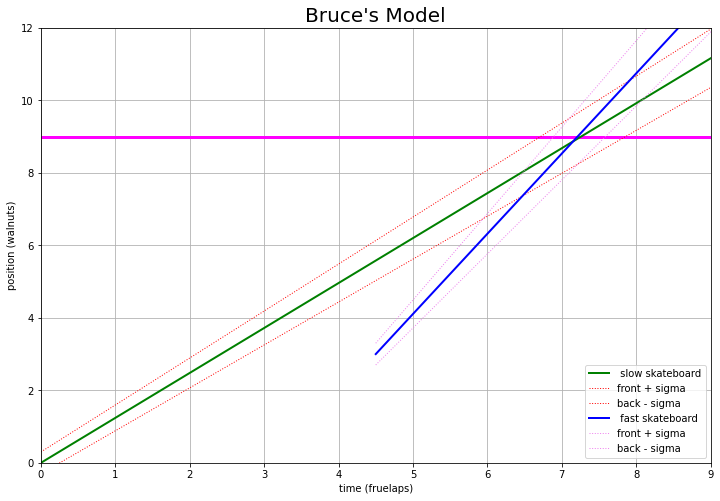

In [13]:
# how long should fast skateboard wait?
waitTime = 4.5 # in s
hallLong = 9. # distance from start point in m
hallShort = 6.
hallDiff = hallLong - hallShort

# plot it
fig5, ax5 = plt.subplots()

# slow skateboard
ax5.plot(modelTime, modelSlowX, color = 'green', linestyle = '-', linewidth = 2., label = " slow skateboard")
ax5.plot(modelTime, frontSFX, color = 'red', linestyle = ':', linewidth = 1., label = "front + sigma")
ax5.plot(modelTime, backSSX, color = 'red', linestyle = ':', linewidth = 1., label = "back - sigma")

# fast skateboard
ax5.plot(modelTime + waitTime, modelFastX+3, color = 'blue', linestyle = '-', linewidth = 2., label = " fast skateboard")
ax5.plot(modelTime + waitTime, frontFFX+3, color = 'violet', linestyle = ':', linewidth = 1., label = "front + sigma")
ax5.plot(modelTime + waitTime, backFSX+3, color = 'violet', linestyle = ':', linewidth = 1., label = "back - sigma")

# draw a horizontal line at location of long hallway distance
ax5.hlines(hallLong, 0., 10, color = 'magenta', linestyle = '-', linewidth = 3.)

# a more explicit way to set labels
plt.xlabel('time (fruelaps)', fontsize = 10)
plt.ylabel('position (walnuts)', fontsize = 10)
plt.title('Bruce\'s Model', fontsize = 20)

# controlling x and y limits on plot to keep things where I want them
plt.xlim([0, 9])
plt.ylim([0, 12])

ax5.grid()
fig5.set_size_inches(12, 8)
plt.legend(loc= 4)
plt.show()


***
## Lab Deliverable:

Given your data for the fast and slow skateboards adjust the plot until it shows them meeting at the same time after the slow cart has gone 9 m and the fast cart has gone 6 m. Yes, this is a 'crash' which is not the goal but it's where you need to start. The intersection doesn't have to be perfect but your plot should demonstrate that you understand how to manage the presentation of your models to meet the criteria. Based on your plot answer the following questions_
- How long has each skateboard been traveling?
- How long did the fast skateboard have to wait before starting?

Now rearrange the plot so that one of the skateboard passes in front of the other at the intersection (slow one still traveling 9 m and the fast one 6 m) roughly 1 m before the other one gets there. Copy and paste (be careful about figure labels) to get new code to produce the new plot. Again answer the following questions. 
- How long has each skateboard been traveling?
- How long did the fast skateboard have to wait before starting?
- Is there a reasonable possibility that the front corner of one will clip the back corner of the other? Explain.
***

***
## Lab Deliverable:

**Reflection**
- Do you feel that you are able to interpret complex plots like these better?
- What did you find intriguing in this lab?
- What did you find most frustrating?

I am deeply saddened that you don't get to do the actual experiment. Perhaps next year you can at least enjoy vicariously when next year's class is trying not to crash.
***

### Extensions

Just if you're interested.

To show the window that the two carts must pass within I needed to plot a patch representing that distance. Here is a resource I used to figure out how to use the ```matplotlib.patches``` library to do so. The magenta area shows a range of $\pm$ 1 m around the 9 m point. As shown it indicates that the fast skateboard is still 1 m from the intersection (right at the edge of the magenta zone) point when the slow skateboard passes through it. The uncertainty in the velocities of the skateboards suggests a real possibility of a collision looking at the actual potnetial overlap of the front and back corners.

[patches](https://www.programcreek.com/python/example/94511/matplotlib.patches) 
[patches.Rectangle](https://matplotlib.org/api/_as_gen/matplotlib.patches.Rectangle.html#matplotlib.patches.Rectangle)

I also included a single scatter plot point to indicate where the delayed skateboard begins.

[managing marker size](https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size)

[no fill in marker](https://stackoverflow.com/questions/4143502/how-to-do-a-scatter-plot-with-empty-circles-in-python)


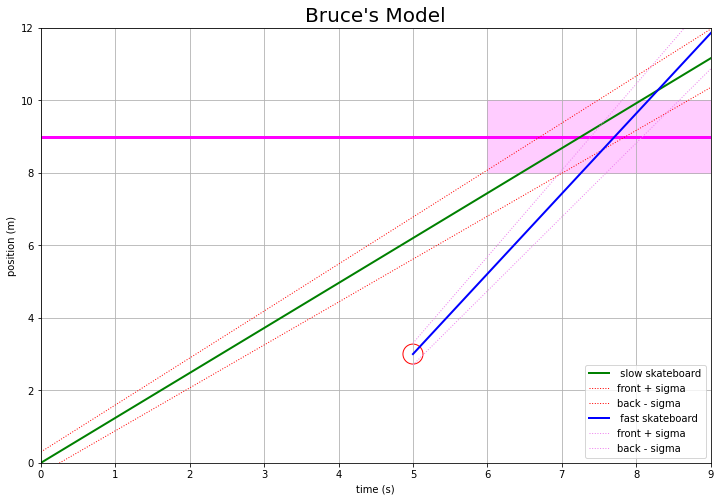

In [25]:
# how long should fast skateboard wait?
waitTime = 5.0 # in s

# plot it
fig6, ax6 = plt.subplots()

# slow skateboard
ax6.plot(modelTime, modelSlowX, color = 'green', linestyle = '-', linewidth = 2., label = " slow skateboard")
ax6.plot(modelTime, frontSFX, color = 'red', linestyle = ':', linewidth = 1., label = "front + sigma")
ax6.plot(modelTime, backSSX, color = 'red', linestyle = ':', linewidth = 1., label = "back - sigma")

# fast skateboard
ax6.plot(modelTime + waitTime, modelFastX + hallDiff, color = 'blue', linestyle = '-', linewidth = 2., label = " fast skateboard")
ax6.plot(modelTime + waitTime, frontFFX + hallDiff, color = 'violet', linestyle = ':', linewidth = 1., label = "front + sigma")
ax6.plot(modelTime + waitTime, backFSX + hallDiff, color = 'violet', linestyle = ':', linewidth = 1., label = "back - sigma")

ax6.hlines(hallLong, 0., 10, color = 'magenta', linestyle = '-', linewidth = 3.)

# start point for delayed skateboard
ax6.scatter(waitTime, 3., s= 400, marker = 'o', facecolors = 'none', edgecolors = 'red')

target = patch.Rectangle((6., 8.), width=4, height=2.,
                             color='magenta',
                             alpha=0.2)

ax6.add_patch(target)

# a more explicit way to set labels
plt.xlabel('time (s)', fontsize = 10)
plt.ylabel('position (m)', fontsize = 10)
plt.title('Bruce\'s Model', fontsize = 20)

# controlling x and y limits on plot to keep things where I want them
plt.xlim([0, 9])
plt.ylim([0, 12])

ax6.grid()
fig6.set_size_inches(12, 8)
plt.legend(loc= 4)
plt.show()

### Reflection

I hate to say it but this was fun figuring out how to do this in python. It creates much more meaningful plots and requires me to think more clearly about what the plots, intersections, and data variability mean. Got a few more useful plotting experiences into the bargin. 